In [2]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:

# Importing the dataset
dataset = pd.read_csv('ObesityDataSet_raw.csv')
dataset.drop(columns='family_history_with_overweight',inplace=True)
dataset.drop(columns='CAEC',inplace=True)
dataset.drop(columns='SCC',inplace=True)
dataset.drop(columns='SMOKE',inplace=True)
dataset.drop(columns='CALC',inplace=True)
dataset.drop(columns='MTRANS',inplace=True)
dataset.drop(columns='NObeyesdad',inplace=True)
dataset.drop(columns='Gender',inplace=True)
dataset

,Gender,Age,Height,Weight,FAVC,FCVC,NCP,CH2O,FAF,TUE
0,Female,21.000000,1.620000,64.000000,no,2.0,3.0,2.000000,0.000000,1.000000
1,Female,21.000000,1.520000,56.000000,no,3.0,3.0,3.000000,3.000000,0.000000
2,Male,23.000000,1.800000,77.000000,no,2.0,3.0,2.000000,2.000000,1.000000
3,Male,27.000000,1.800000,87.000000,no,3.0,3.0,2.000000,2.000000,0.000000
4,Male,22.000000,1.780000,89.800000,no,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,3.0,3.0,1.728139,1.676269,0.906247
2107,Female,21.982942,1.748584,133.742943,yes,3.0,3.0,2.005130,1.341390,0.599270
2108,Female,22.524036,1.752206,133.689352,yes,3.0,3.0,2.054193,1.414209,0.646288
2109,Female,24.361936,1.739450,133.346641,yes,3.0,3.0,2.852339,1.139107,0.586035


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
dataset[dataset.isnull().any(axis=1)]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad


In [ ]:
dataset['NObeyesdad'].unique()

1 --> 176108.77999999997
2 --> 87121.56591478696
3 --> 59486.96143928035
4 --> 39529.8879673635
5 --> 31674.90624927937
6 --> 25643.265320259463
7 --> 21839.635516285514
8 --> 18808.749269005846
9 --> 16044.791695328167
10 --> 13912.451770855005


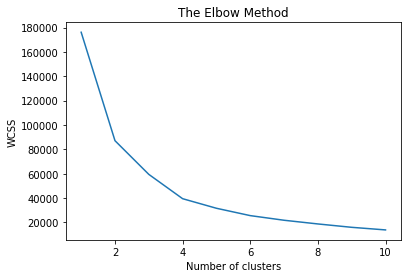

In [19]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(str(i) +" --> "+ str(kmeans.inertia_))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

`terlihat optimalnya di titik 5`

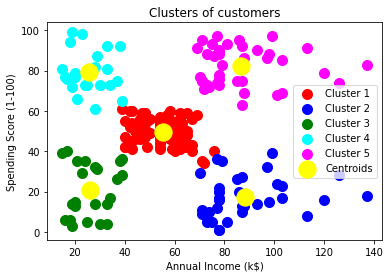

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()